### Analyse de la satisfaction client

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import chdir

#### Importattion des données

In [4]:
chdir('/home/niang/Bureau/Analyse de la satisfaction/fichiers')

In [5]:
data = pd.read_csv("ensai2021_citeduchocolat.csv", sep =';')

In [6]:
data.head()# Affiche une partie des données

,titre,date_visite,ville,note,commentaire
0,Visite interessante,octobre 2020,lieu non indiqué,40,"On apprend tous les secrets sur le chocolat, l..."
1,magasin parfait,octobre 2020,"Ville de Roanne, France",50,beaucoup de choix avec des vendeuses aimables ...
2,très bel accueil,octobre 2020,"Ville de Roanne, France",50,c'est une visite très enrichissante et très bi...
3,Miam,septembre 2020,"Lyon, France",50,"Visite très ludique, avec BEAUCOUP de dégustat..."
4,Bonne expérience chocolaté,septembre 2020,"Moirans-en-Montagne, France",40,Si vous êtes dans le coin à faire\r\nOn goûte ...


In [130]:
data["commentaire"][0]

"On apprend tous les secrets sur le chocolat, la visite sur RDV (du fait du COVID) permet d'avoir moins d m onde pendant la visite."

#### Analyse et Exploration des données

In [7]:
data.shape # donne le nombre de colonnes et de commentaires
           # On a 300 commentaires et 5 colonnes 

(300, 5)

In [8]:
data.dtypes #le type des données

titre          object
date_visite    object
ville          object
note            int64
commentaire    object
dtype: object

In [9]:
data["commentaire"][0] 

"On apprend tous les secrets sur le chocolat, la visite sur RDV (du fait du COVID) permet d'avoir moins d m onde pendant la visite."

In [10]:
data.isna().sum() # Voir les données manquantes
                  # On a pas de données manquantes

titre          0
date_visite    0
ville          0
note           0
commentaire    0
dtype: int64

In [11]:
data["note"].unique() # les différentes notes des visiteurs
                      # Les notes varies entre 10 et 50

array([40, 50, 20, 10, 30])

In [229]:
data[data["note"] == 20]["commentaire"][262]

'L’entrée correspond à la quantité de chocolat que vous mangerez pendant la visite\r\nSinon, ce n’est pas folichon\r\nLa boutique de fin ne propose pas de tarifs franchement intéressant sauf en ce qui concerne les rebuts/2ème choix : chocolats non parfait vendu au 1/4 du prix (mais le goût est exact)'

#### Répartition des notes selon les commentaires

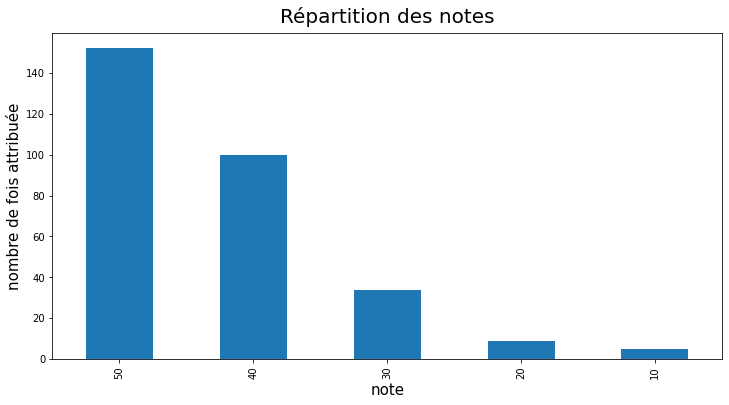

In [13]:
plt.figure(figsize=(12,6))
data["note"].value_counts().plot(kind = "bar")
plt.title("Répartition des notes", fontsize=20, pad=10)
plt.xlabel("note", fontsize=15)
plt.ylabel("nombre de fois attribuée", fontsize=15)
plt.show()

On remarque ici que le nombre client ayant attribué une note 50 est fortement élevée, par contre la note de 10 n'a pas été beaucoup de fois attribué.

In [14]:
import spacy

In [15]:
nlp = spacy.load("fr_core_news_sm")

In [16]:
""""def return_token(sentence):
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner le texte de chaque token
    return [X.text for X in doc]
"""

'"def return_token(sentence):\n    # Tokeniser la phrase\n    doc = nlp(sentence)\n    # Retourner le texte de chaque token\n    return [X.text for X in doc]\n'

In [17]:
phrase = list(data["commentaire"])

In [18]:
#return_token(phrase[0])


In [19]:
#list_phrase

#### Tokenisation, normalisation et lemmatisation

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to /home/niang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
""""clean_words = []
for token in return_token(phrase[0]):
    if token not in STOPWORDS:
        clean_words.append(token)

clean_words
"""

#tokenizer.tokenize(commentaire)

'"clean_words = []\nfor token in return_token(phrase[0]):\n    if token not in STOPWORDS:\n        clean_words.append(token)\n\nclean_words\n'

In [22]:
def return_token_lemma(word):
    #token = [token.lemma_ for token in nlp(sentence)]
    for token in nlp(word):
        token = token.lemma_
    return(token)

In [23]:
from nltk.tokenize import RegexpTokenizer
import unicodedata

def list_token(col):
    list_token_commentaire = []
    tokenizer = RegexpTokenizer(r'\w+')
    
    for commentaire in col:
        list_phrase = [unicodedata.normalize('NFKD',token.lower()).encode('ascii', 'ignore').decode('utf-8', 'ignore') 
               for token in tokenizer.tokenize(commentaire)]
        clean_words = []
        
        for token in list_phrase:
            if token not in STOPWORDS:
                clean_words.append(return_token_lemma(token))
        
        list_token_commentaire.append(clean_words)
    return(list_token_commentaire)

In [24]:
token_commentaire = list_token(data["commentaire"])

In [25]:
data["token_commentaire"] = token_commentaire

In [26]:
!pip install gensim

In [27]:
from gensim.models import Word2Vec # importatipn de word2vec

In [28]:
!pip install python-Levenshtein

In [29]:
ListVbt = list(data["token_commentaire"]) # liste des commentaires
model = Word2Vec(sentences = ListVbt, vector_size=100, min_count=1) # création du modèle

In [30]:
#from gensim.test.utils import common_texts

In [31]:
#model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
#model.save("word2vec.model")

In [32]:
#common_texts

In [33]:
token_commentaire[0]

['apprendre',
 'tout',
 'secret',
 'chocolat',
 'visite',
 'rdv',
 'fait',
 'covid',
 'permettre',
 'avoir',
 'moins',
 'onde',
 'pendant',
 'visite']

In [34]:
model.wv.most_similar(positive="restaurant")

[('tout', 0.9945991635322571),
 ('avoir', 0.9945931434631348),
 ('chocolat', 0.9939906597137451),
 ('degustation', 0.9938573241233826),
 ('visite', 0.9937911629676819),
 ('faire', 0.9935811758041382),
 ('bien', 0.9932457208633423),
 ('eter', 0.9932007789611816),
 ('bon', 0.9931412935256958),
 ('ludique', 0.9931337237358093)]

In [35]:
model.wv.most_similar(positive="nul")

[('noir', 0.678905725479126),
 ('expliqu', 0.678501546382904),
 ('reste', 0.6773814558982849),
 ('patisserie', 0.6764955520629883),
 ('an', 0.6761061549186707),
 ('bel', 0.6739506721496582),
 ('bien', 0.6737720370292664),
 ('5', 0.6733508706092834),
 ('aller', 0.6724103093147278),
 ('accueil', 0.6689753532409668)]

In [36]:
model.wv.similarity('nul', 'restaurant')

0.6467748

In [37]:
model.wv.get_vecattr("restaurant", "count")

23

In [38]:
model.vector_size

100

In [39]:
model.wv["nul"]

array([ 7.13389972e-03,  2.50709499e-03,  4.67363978e-03,  4.58702026e-03,
       -9.07804817e-03, -1.41228549e-02,  1.61512883e-03,  8.18726141e-03,
       -1.21966740e-02, -5.99150686e-03, -7.89562147e-03,  2.07590841e-04,
        6.03934377e-03,  1.26120681e-02,  2.20948644e-03, -5.95650030e-03,
        6.86781434e-03, -1.20183723e-02, -1.12407701e-03, -2.21960638e-02,
        4.52803914e-03, -1.96272694e-03,  1.17074084e-02, -3.42964195e-04,
       -1.28043173e-02, -2.33990070e-03, -3.67135531e-03,  2.13253987e-03,
       -8.04326776e-03,  4.45747003e-03, -1.67805620e-03, -6.77134516e-03,
       -7.42273126e-03, -3.13647150e-04, -1.81031181e-03,  6.82348153e-03,
       -5.28362719e-03, -1.40367262e-02, -4.22770903e-03, -2.35365168e-03,
        1.13806855e-02, -1.35371322e-02,  5.41278999e-03,  4.87123616e-03,
        3.84640205e-03,  1.21380470e-03, -3.97964567e-03,  4.13898937e-03,
        1.07707502e-02, -9.84434038e-04,  7.02415081e-03, -4.41294676e-03,
        2.74484162e-03, -

In [40]:
model.wv.key_to_index

{'avoir': 0,
 'chocolat': 1,
 'visite': 2,
 'tre': 3,
 'tout': 4,
 'degustation': 5,
 'boutiqu': 6,
 'bien': 7,
 'bon': 8,
 'pouvoir': 9,
 'plus': 10,
 'petit': 11,
 'faire': 12,
 'ludique': 13,
 'enfant': 14,
 'beaucoup': 15,
 'grand': 16,
 'deguster': 17,
 'fabrication': 18,
 'atelier': 19,
 'valrhoner': 20,
 'cite': 21,
 'gouter': 22,
 'musee': 23,
 'apprendre': 24,
 'si': 25,
 'fait': 26,
 'prix': 27,
 'peu': 28,
 'bel': 29,
 'eter': 30,
 'explication': 31,
 'decouverte': 32,
 'mem': 33,
 'interessant': 34,
 'chose': 35,
 'ce': 36,
 'aussi': 37,
 'gourmand': 38,
 'entree': 39,
 'personnel': 40,
 'moment': 41,
 'different': 42,
 'mond': 43,
 'car': 44,
 'sans': 45,
 'sympa': 46,
 'vraiment': 47,
 'agreabl': 48,
 'decouvrir': 49,
 'endroit': 50,
 'heure': 51,
 'long': 52,
 'cher': 53,
 'surtout': 54,
 'qualite': 55,
 'apre': 56,
 'parcour': 57,
 'dommage': 58,
 'plein': 59,
 'accueil': 60,
 'restaurant': 61,
 'permettre': 62,
 'voir': 63,
 'differente': 64,
 'visiter': 65,
 'produit'

In [41]:
"""
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model.wv[word] for word in words if word in model.wv.key_to_index]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.wv.key_to_index]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)
"""

"\n# Filter the list of vectors to include only those that Word2Vec has a vector for\nvector_list = [model.wv[word] for word in words if word in model.wv.key_to_index]\n\n# Create a list of the words corresponding to these vectors\nwords_filtered = [word for word in words if word in model.wv.key_to_index]\n\n# Zip the words together with their vector representations\nword_vec_zip = zip(words_filtered, vector_list)\n\n# Cast to a dict so we can turn it into a DataFrame\nword_vec_dict = dict(word_vec_zip)\ndf = pd.DataFrame.from_dict(word_vec_dict, orient='index')\ndf.head(3)\n"

#### Transformation des données en word2vec

In [42]:
words_filtered = []
vector_list = []
for token_com in token_commentaire:
    
    # Creation des listes de mots correspondant aux vecteurs
    words_filtered = words_filtered + [word for word in token_com if word in model.wv.key_to_index]
    
    vector_list = vector_list + [model.wv[word] for word in token_com if word in model.wv.key_to_index]

In [43]:
# Zip les mots ensembles avec leurs vecteurs de représentations
word_vec_zip = zip(words_filtered, vector_list)

In [44]:
# Mettre sous forme dictionnaire puis en dataframe
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')

In [45]:
df.head() # données en word2vec

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
apprendre,-0.036540,0.109244,0.025507,-0.000063,-0.019613,-0.181013,0.096603,0.221935,-0.069190,-0.109861,...,0.124413,0.019099,-0.006909,-0.028268,0.141587,0.075926,0.043749,-0.091264,0.000952,-0.022530
tout,-0.057662,0.178287,0.028326,0.007512,-0.011654,-0.269246,0.141680,0.349249,-0.106001,-0.154524,...,0.200020,0.039509,-0.005272,-0.050506,0.222968,0.128432,0.059534,-0.129889,-0.006169,-0.017103
secret,-0.003760,0.026248,0.007632,0.003823,0.003697,-0.038658,0.022163,0.053756,-0.017436,-0.032597,...,0.031983,0.015457,0.004836,-0.000082,0.043912,0.031636,0.006374,-0.028624,-0.004483,0.002528
chocolat,-0.076467,0.241457,0.052830,0.019659,-0.013465,-0.375528,0.189165,0.471899,-0.139708,-0.223770,...,0.264882,0.058079,-0.012356,-0.070017,0.291899,0.185620,0.076033,-0.182603,-0.019599,-0.021846
visite,-0.047833,0.170734,0.026811,0.008140,-0.006718,-0.251598,0.127940,0.329486,-0.104219,-0.146121,...,0.180601,0.047442,-0.000663,-0.048050,0.215927,0.134290,0.056655,-0.126536,0.001061,-0.026492


In [46]:
df.shape

(1977, 100)

In [47]:
new_data = data.copy()

new_data.set_index("commentaire", inplace=True)

In [48]:
new_data.head()

,titre,date_visite,ville,note,token_commentaire
commentaire,,,,,
"On apprend tous les secrets sur le chocolat, la visite sur RDV (du fait du COVID) permet d'avoir moins d m onde pendant la visite.",Visite interessante,octobre 2020,lieu non indiqué,40,"[apprendre, tout, secret, chocolat, visite, rd..."
beaucoup de choix avec des vendeuses aimables et disponibles. attention au prix du panier cela monte vite!,magasin parfait,octobre 2020,"Ville de Roanne, France",50,"[beaucoup, choix, vendeur, aimable, disponible..."
c'est une visite très enrichissante et très bien organisée. il faut compter 2 heures de visite bien fléchée avec le covid,très bel accueil,octobre 2020,"Ville de Roanne, France",50,"[visite, tre, enrichissante, tre, bien, organi..."
"Visite très ludique, avec BEAUCOUP de dégustations (préparez vous). Une très belle découverte, et guides très sympathiques ! Seul petit bémol : un timing assez serré entre les ateliers, pas le temps de flâner si vous ne voulez pas rater une dégustation",Miam,septembre 2020,"Lyon, France",50,"[visite, tre, ludique, beaucoup, degustation, ..."
Si vous êtes dans le coin à faire\r\nOn goûte on découvre on apprend\r\nBémol un peu trop usine\r\nPrévoir bien 1h45 pour tout regarder en détail,Bonne expérience chocolaté,septembre 2020,"Moirans-en-Montagne, France",40,"[si, eter, coin, avoir, faire, goute, decouvre..."


#### Nuages des mots

In [49]:
!pip install adjustText

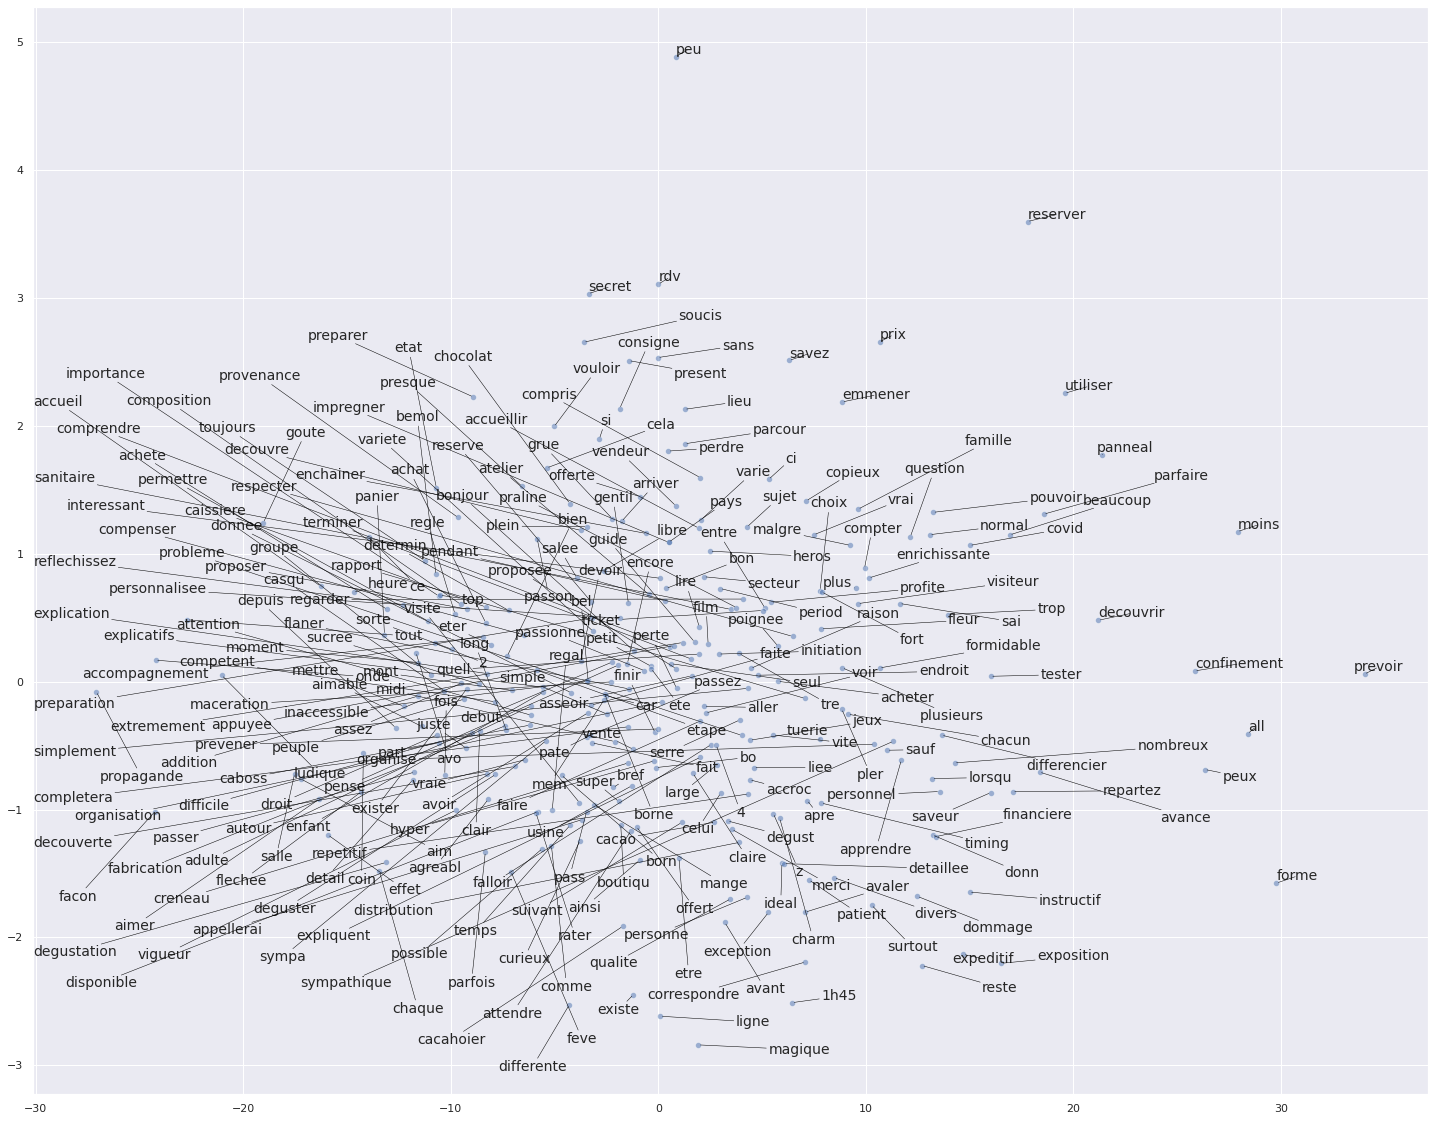

In [64]:
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize = (25, 20))
sns.scatterplot(X_projected[:, 0], X_projected[:, 1], alpha = 0.5)

# Import adjustText, initialiser la liste texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 300))

# Ajouter les mots dans la liste
for word in words_to_plot:
    texts.append(plt.text(X_projected[word, 0], X_projected[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [111]:
#from functions import *

In [112]:
#Y = df.values

In [113]:
#names = new_data.index

#### Application d'un Kmeans sur nos données en word2vec

In [52]:
from sklearn import preprocessing

In [53]:
#std_cale = preprocessing.StandardScaler().fit(Y)
#Y_scaled = std_cale.transform(Y)

In [54]:
#from scipy.cluster.hierarchy import linkage, fcluster
#Z = linkage(Y_scaled, 'ward')

In [55]:
#plot_dendrogram(Z, data["titre"])

In [56]:
#from scipy.cluster.hierarchy import ward, dendrogram

In [57]:
# C'est là que Word2vec intervient
X = []

for phrase in token_commentaire:
    vec_phrase = []
    for mot in phrase:
        vec_phrase.append(model.wv[mot])
    X.append(np.mean(vec_phrase,0)) # moyenne des commentaires

In [58]:
# Normalistion des données
std_cale = preprocessing.StandardScaler().fit(X)
X_scaled = std_cale.transform(X)

In [131]:
from nltk.cluster import KMeansClusterer
import numpy as np 

from sklearn import cluster
from sklearn import metrics


kclusterer = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
clusters = kclusterer.cluster(X_scaled, assign_clusters=True)
print (clusters)

for index, phrase in enumerate(data["commentaire"]):    
    print (str(clusters[index]) + ":" + str(phrase))

kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(X_scaled)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

[1, 4, 3, 4, 4, 3, 4, 0, 4, 4, 0, 4, 2, 0, 0, 3, 4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 4, 0, 1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 3, 4, 0, 4, 0, 0, 3, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 3, 0, 4, 0, 1, 0, 4, 4, 0, 0, 4, 1, 0, 0, 0, 1, 0, 3, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0, 0, 4, 1, 4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 3, 0, 1, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 3, 0, 4, 4, 0, 4, 4, 1, 4, 4, 0, 4, 4, 0, 0, 0, 0, 1, 4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 1, 0, 4, 4, 0, 4, 4, 3, 4, 0, 4, 0, 2, 4, 4, 0, 4, 4, 1, 1, 4, 1, 4, 4, 0, 0, 4, 0, 4, 4, 4, 4, 1, 0, 3, 0, 1, 2, 4, 0, 4, 0, 4, 0, 0, 4, 4, 1, 4, 4, 4, 0, 0, 0, 0, 0, 0, 2, 4, 3, 1, 0, 4, 4, 1, 0, 4, 2, 4, 1, 2, 4, 4, 4, 0, 4, 1, 4, 0, 4, 1, 4, 4, 2, 4, 0, 3, 0, 4, 4, 0, 0, 4, 4, 4, 0, 3, 0, 4, 2, 4, 0, 0, 0, 0, 3, 0, 4, 0, 4, 4, 4, 4, 0, 1, 1, 0, 1, 0, 4, 4, 0, 0, 0, 4, 1, 2, 0, 3, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4, 4, 0, 4, 4, 0, 4, 4, 1, 0]
1:On apprend tous les secrets sur le chocolat, la visite sur RDV (du fait du COVID) permet d'avoir 

<Figure size 2160x2160 with 0 Axes>

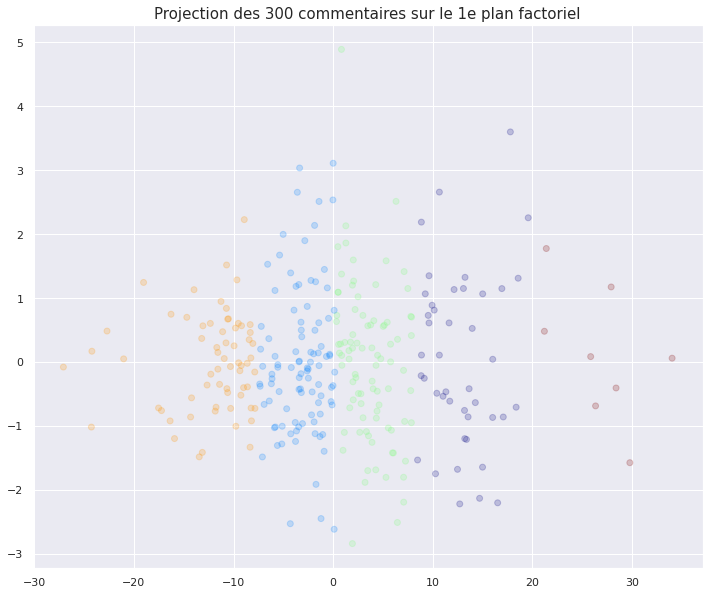

In [132]:
from sklearn import decomposition

plt.figure(figsize=(30, 30))
pca = decomposition.PCA(n_components=3).fit(X_scaled)
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(12,10))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=labels.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} commentaires sur le 1e plan factoriel".format(X_projected.shape[0]), fontsize=15)
plt.show()

#for i, (x,y) in enumerate(zip(X_projected[:, 0], X_projected[:, 1])):
    
    #plt.text(x, y, new_data[i])

In [133]:
names = new_data.index

In [134]:
new_table = pd.DataFrame({"cluster": clusters, "commentaire": names})

In [135]:
new_table["title"] = [data.loc[index, "titre"] for index in data.index]

In [136]:
new_table

,cluster,commentaire,title
0,1,"On apprend tous les secrets sur le chocolat, l...",Visite interessante
1,4,beaucoup de choix avec des vendeuses aimables ...,magasin parfait
2,3,c'est une visite très enrichissante et très bi...,très bel accueil
3,4,"Visite très ludique, avec BEAUCOUP de dégustat...",Miam
4,4,Si vous êtes dans le coin à faire\r\nOn goûte ...,Bonne expérience chocolaté
...,...,...,...
295,0,Cette cité est très instructive pour connaître...,Magnifique cité ..
296,4,"Musée et dégustation de différents chocolats, ...",A faire !
297,4,Alors un peu honte de dire qu'on a pas fait la...,Pour gourmands petits et grands !
298,1,"On peut joindre l'utile et l'agréable, la preu...",INSTRUCTIF et INTERESSANT


In [137]:
#new_table.pivot_table(index="cluster", columns="title", aggfunc=len, fill_value=0)

In [140]:
new_table["cluster"].value_counts()

4    143
0    106
1     26
3     16
2      9
Name: cluster, dtype: int64

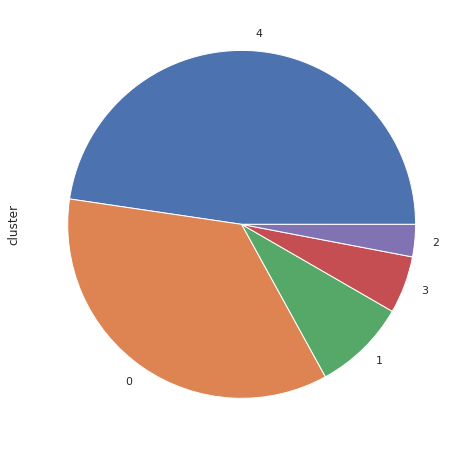

In [139]:
plt.figure(figsize=(12, 8))
new_table["cluster"].value_counts().plot(kind="pie")
plt.show()

#### Regardons le cluster 1 qui regroupe quatre commentaire

In [159]:
# certains commentaires positifs
print("0.", new_table[new_table["cluster"] == 1]["commentaire"][0])
print(" ")
print("28.", new_table[new_table["cluster"] == 1]["commentaire"][28])
print(" ")
print("73.", new_table[new_table["cluster"] == 1]["commentaire"][73])
print(" ")
print("89.", new_table[new_table["cluster"] == 1]["commentaire"][89])
print("109.", new_table[new_table["cluster"] == 1]["commentaire"][109])
print(" ")
print("130.", new_table[new_table["cluster"] == 1]["commentaire"][130])
print("170.", new_table[new_table["cluster"] == 1]["commentaire"][170])
print("172.", new_table[new_table["cluster"] == 1]["commentaire"][183])
print(" ")
print("266.", new_table[new_table["cluster"] == 1]["commentaire"][266])# commander en ligne
print("276.", new_table[new_table["cluster"] == 1]["commentaire"][276])
print(" ")
print("298.", new_table[new_table["cluster"] == 1]["commentaire"][298])
print("265.", new_table[new_table["cluster"] == 1]["commentaire"][265])
print(" ")
print("268.", new_table[new_table["cluster"] == 1]["commentaire"][268])

0. On apprend tous les secrets sur le chocolat, la visite sur RDV (du fait du COVID) permet d'avoir moins d m onde pendant la visite.
 
28. La visite de la cité du chocolat était très intéressante. Notre guide était à l'écoute des questions et a réussi à dynamiser la visite.

Les dégustations sont nombreuses et surprenantes.

En raison de l'épidémie, de nombreuses activités n'étaient pas accessibles lors de notre visite ce qui fait que les petits ont trouvé la visite un peu longue malgré la bonne volonté de notre guide.

On reviendra sûrement quand tout sera de nouveau opérationnel.
 
73. Découverte de la cité du chocolat Valrhona avec nos deux enfants. Bel espace interactif à recommander pour découvrir le cacao de sa culture à sa transformation en chocolat, puis en pâtisseries. De nombreuses bornes interactives, des explications claires et des dégustations à gogo. Boutique attenante pour qui veut prolonger le plaisir par des achats.
 
89. visite intéressante et innovante autour de la 

In [240]:
# chéreté des produits
print("140.", new_table[new_table["cluster"] == 1]["commentaire"][140])
print(" ")
print("151.", new_table[new_table["cluster"] == 1]["commentaire"][151])
print("169.", new_table[new_table["cluster"] == 1]["commentaire"][169])
print(" ")
print("187.", new_table[new_table["cluster"] == 1]["commentaire"][187])
print("198.", new_table[new_table["cluster"] == 1]["commentaire"][198])
print(" ")
print("220.", new_table[new_table["cluster"] == 1]["commentaire"][220])
print("227.", new_table[new_table["cluster"] == 1]["commentaire"][227])
print(" ")
print("208.", new_table[new_table["cluster"] == 2]["commentaire"][208])
print(" ")
print("250.", new_table[new_table["cluster"] == 2]["commentaire"][250])
print(" ")
print("258.", new_table[new_table["cluster"] == 4]["commentaire"][258])
print(" ")
print("101.", new_table[new_table["cluster"] == 4]["commentaire"][101])
print(" ")
print("212.", new_table[new_table["cluster"] == 0]["commentaire"][212])
print(" ")
print("251.", new_table[new_table["cluster"] == 4]["commentaire"][251])
print(" ")
print("259.", new_table[new_table["cluster"] == 0]["commentaire"][259])
print(" ")
print("262.", new_table[new_table["cluster"] == 4]["commentaire"][262])

140. Certes la visite est intéressante , on peut déguster , mais cela reste un peu cher. La boutique est grande et propose beaucoup de choix
 
151. Une après-midi consacrée à la gourmandise, au chocolat sous toutes ses formes.
Bon ! l'entrée est un peu chère....mais dégustation à volonté ;) En ces vacances de Pâques beaucoup de monde, nous aurions apprécié plus de personnel pour de plus amples explications et non déambuler un peu au hasard !
169. nous n'avons pas fait la visite mais uniquement la boutique. Pour moi qui suis une "droguée' du chocolat, je me trouvais au paradis. Soit c'est un peu cher, mais il y en a pour tous les goûts, et vous pouvez tout gouter en livre service avant d'acheter. C'est top.
 
187. Incroyable de voir tous ces chocolats en dégustation. Bien généreux, en revanche, les prix sont également bien généreux... voir un peu cher!
198. Visite très chouette à faire. Des dégustations variées, des tests olfactifs, des informations intéressantes et bien mises en scène.

In [196]:
# mauvaise qualité du restaurant
print("23.", new_table[new_table["cluster"] == 0]["commentaire"][23])
print(" ")
print("24.", new_table[new_table["cluster"] == 0]["commentaire"][24]

print(" ")

print("173.", new_table[new_table["cluster"] == 4]["commentaire"][173])
print(" ")
print("171.", new_table[new_table["cluster"] == 4]["commentaire"][171])

23. Visite pas mal personnel sympa par contre restaurant enfin cafétéria nul pas bon très cher plus de pain à 13h très petit à éviter absolument
 
24. Nous avons pris la formule visite plus repas
La visite très bien personnel très agréable
Par contre fuir le restaurant pas sympa plus de pain à 13h espace réduit une cafétéria en fait et pas très bon
Un piège à touriste après la visite il,faut faire la queue dehors pour aller à magasin
 
173. Tarif exhorbitant 8€ alors que le musée est fermé pour rénovation. 1 j'ai mangé au resto bon mais cher 2 j'ai pris les billets une arnaque car vous avez environ 30m2 d'expo. qui vous explique avec des écrans, les compositions des chocolats,, les recettes et rien d'autre à oui quelques dégustations de chocolat
 
171. Visite du 30 mars : 4€/ personne car des travaux ont limité notre visite à un seul niveau . De plus nous n'avns pu assister à aucune démonstration soit parce qu'elles venaient de commencer soit parce qu'elles ne reprenaient que 3 h 30 pl

On voit ici que les clients se plaignent de la chaireté des prix 

#### Regardons le cluster 2 qui regroupe 5 commentaires

Ici on voit que l'enseigne privilége la réservation par internet pour profiter de certains services 

#### Regardons quelques commentaires sur le cluster 5

On remarque les memes commentaires que sur le cluster 2. On voit ici que les clients se plaignent de la chaireté du prix de la boutique et de la visite. A améliorer.